<a href="https://colab.research.google.com/github/Ashi-Jain/helmet_vest/blob/main/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a align="left" href="https://ultralytics.com/yolov5" target="_blank">
<img width="1024", src="https://user-images.githubusercontent.com/26833433/125273437-35b3fc00-e30d-11eb-9079-46f313325424.png"></a>

This is the **official YOLOv5 🚀 notebook** by **Ultralytics**, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://ultralytics.com. Thank you!

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.0-184-g6865d19 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.0/78.2 GB disk)


In [2]:
!unzip -q ../testing.zip -d ../

# 1. Inference

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-184-g6865d19 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.032s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 1 tie, Done. (0.029s)
Speed: 0.5ms pre-process, 30.1ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


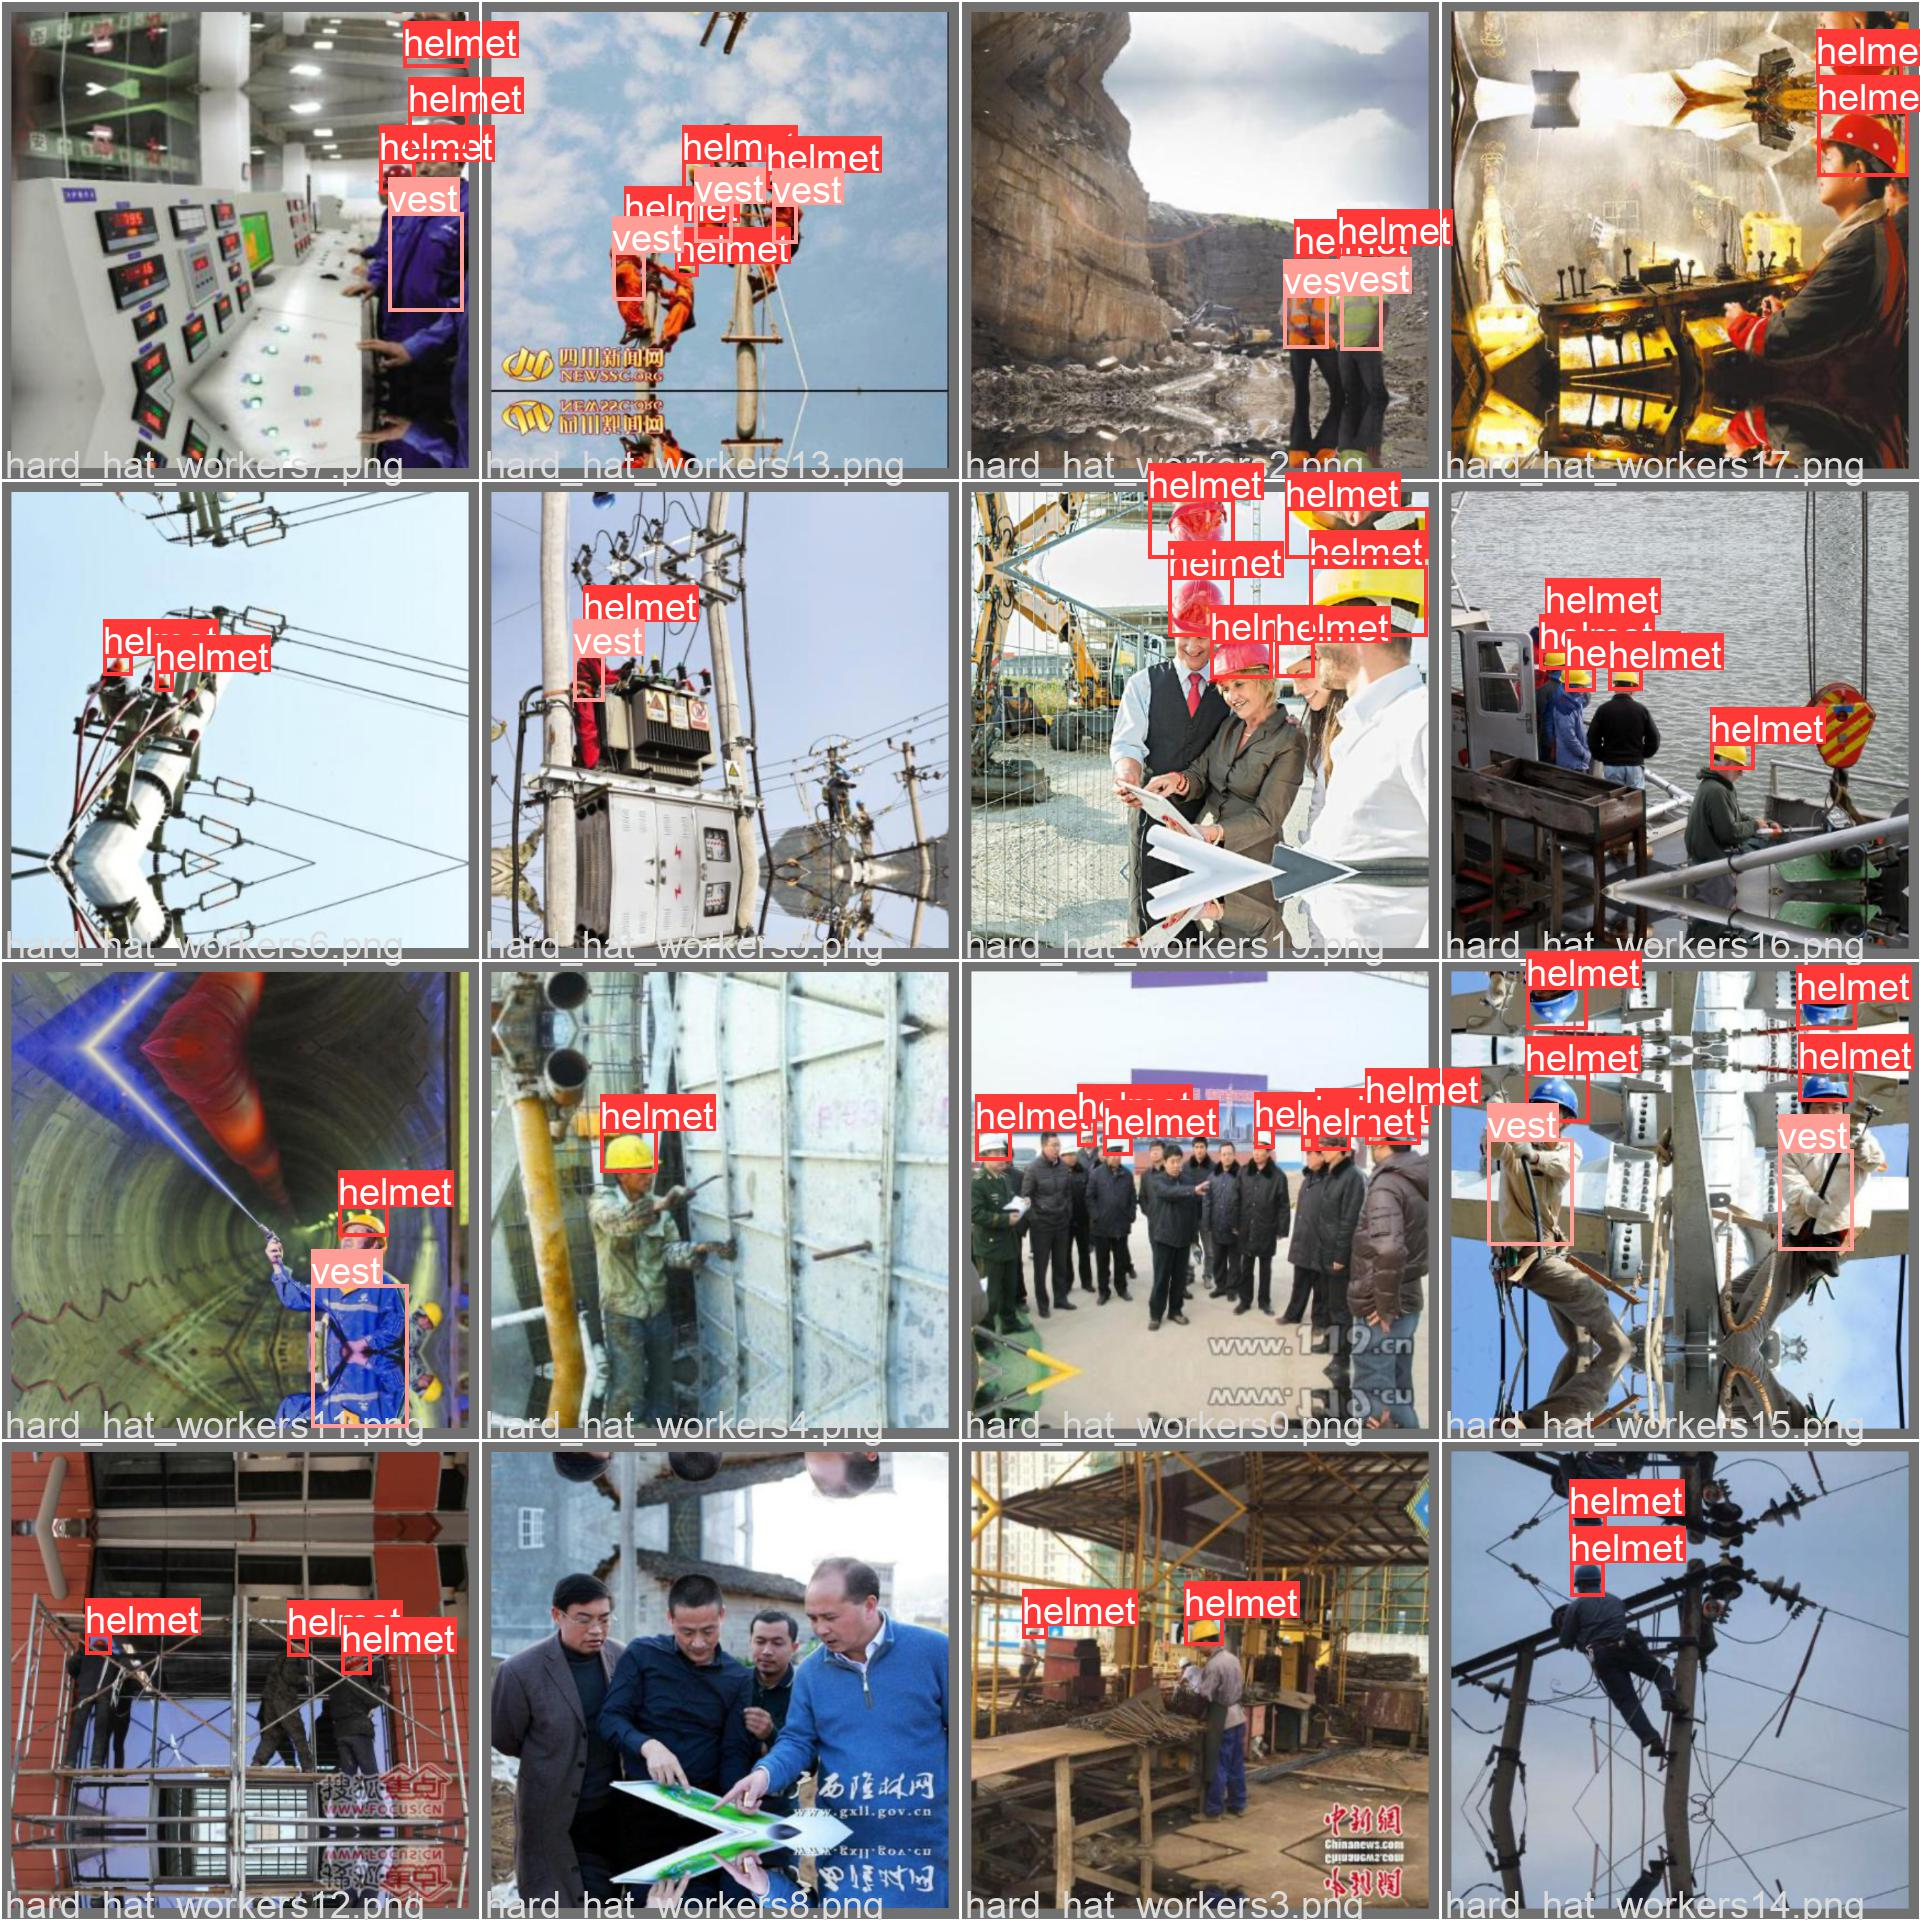

In [5]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/train/exp/val_batch0_labels.jpg', width=600)

# 2. Validate
Validate a model's accuracy on [COCO](https://cocodataset.org/#home) val or test-dev datasets. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be ~1% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

## COCO val
Download [COCO val 2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L14) dataset (1GB - 5000 images), and test model accuracy.

In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip

  0%|          | 0.00/780M [00:00<?, ?B/s]

In [ ]:
# Run YOLOv5x on COCO val
!python val.py --weights yolov5x.pt --data coco.yaml --img 640 --iou 0.65 --half

val: data=/content/yolov5/data/coco.yaml, weights=['yolov5x.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True
YOLOv5 🚀 v6.0-48-g84a8099 torch 1.10.0+cu102 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

100% 166M/166M [00:03<00:00, 54.1MB/s]

Fusing layers... 
Model Summary: 444 layers, 86705005 parameters, 0 gradients
val: Scanning '../datasets/coco/val2017' images and labels...4952 found, 48 missing, 0 empty, 0 corrupted: 100% 5000/5000 [00:01<00:00, 2636.64it/s]
val: New cache created: ../datasets/coco/val2017.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 157/157 [01:12<00:00,  2.17it/s]
                 all       5000      36335      0.729       0.63      0.683      0.496
Speed: 0.1ms pre-process, 4.9ms inference, 1.9ms NMS per image a

## COCO test
Download [COCO test2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L15) dataset (7GB - 40,000 images), to test model accuracy on test-dev set (**20,000 images, no labels**). Results are saved to a `*.json` file which should be **zipped** and submitted to the evaluation server at https://competitions.codalab.org/competitions/20794.

In [ ]:
# Download COCO test-dev2017
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017labels.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip
!f="test2017.zip" && curl http://images.cocodataset.org/zips/$f -o $f && unzip -q $f -d ../datasets/coco/images

In [ ]:
# Run YOLOv5x on COCO test
!python val.py --weights yolov5x.pt --data coco.yaml --img 640 --iou 0.65 --half --task test

In [ ]:
# Tensorboard  (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

In [ ]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb
wandb.login()

In [3]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data custom_data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-184-g6865d19 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0

# 4. Visualize

## Weights & Biases Logging 🌟 NEW

[Weights & Biases](https://wandb.ai/site?utm_campaign=repo_yolo_notebook) (W&B) is now integrated with YOLOv5 for real-time visualization and cloud logging of training runs. This allows for better run comparison and introspection, as well improved visibility and collaboration for teams. To enable W&B `pip install wandb`, and then train normally (you will be guided through setup on first use). 

During training you will see live updates at [https://wandb.ai/home](https://wandb.ai/home?utm_campaign=repo_yolo_notebook), and you can create and share detailed [Reports](https://wandb.ai/glenn-jocher/yolov5_tutorial/reports/YOLOv5-COCO128-Tutorial-Results--VmlldzozMDI5OTY) of your results. For more information see the [YOLOv5 Weights & Biases Tutorial](https://github.com/ultralytics/yolov5/issues/1289). 

<p align="left"><img width="900" alt="Weights & Biases dashboard" src="https://user-images.githubusercontent.com/26833433/135390767-c28b050f-8455-4004-adb0-3b730386e2b2.png"></p>

# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Google Colab and Kaggle** notebooks with free GPU: <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/GCP-Quickstart)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/AWS-Quickstart)
- **Docker Image**. See [Docker Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/Docker-Quickstart) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![CI CPU testing](https://github.com/ultralytics/yolov5/workflows/CI%20CPU%20testing/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/export.py)) on MacOS, Windows, and Ubuntu every 24 hours and on every commit.


# Appendix

Optional extras below. Unit tests validate repo functionality and should be run on any PRs submitted.


In [ ]:
# Reproduce
for x in 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x':
  !python val.py --weights {x}.pt --data coco.yaml --img 640 --task speed  # speed
  !python val.py --weights {x}.pt --data coco.yaml --img 640 --conf 0.001 --iou 0.65  # mAP

In [ ]:
# PyTorch Hub
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Images
dir = 'https://ultralytics.com/images/'
imgs = [dir + f for f in ('zidane.jpg', 'bus.jpg')]  # batch of images

# Inference
results = model(imgs)
results.print()  # or .show(), .save()

In [ ]:
# CI Checks
%%shell
export PYTHONPATH="$PWD"  # to run *.py. files in subdirectories
rm -rf runs  # remove runs/
for m in yolov5n; do  # models
  python train.py --img 64 --batch 32 --weights $m.pt --epochs 1 --device 0  # train pretrained
  python train.py --img 64 --batch 32 --weights '' --cfg $m.yaml --epochs 1 --device 0  # train scratch
  for d in 0 cpu; do  # devices
    python val.py --weights $m.pt --device $d # val official
    python val.py --weights runs/train/exp/weights/best.pt --device $d # val custom
    python detect.py --weights $m.pt --device $d  # detect official
    python detect.py --weights runs/train/exp/weights/best.pt --device $d  # detect custom
  done
  python hubconf.py  # hub
  python models/yolo.py --cfg $m.yaml  # build PyTorch model
  python models/tf.py --weights $m.pt  # build TensorFlow model
  python export.py --img 64 --batch 1 --weights $m.pt --include torchscript onnx  # export
done

In [ ]:
# Profile
from utils.torch_utils import profile

m1 = lambda x: x * torch.sigmoid(x)
m2 = torch.nn.SiLU()
results = profile(input=torch.randn(16, 3, 640, 640), ops=[m1, m2], n=100)

In [ ]:
# Evolve
!python train.py --img 640 --batch 64 --epochs 100 --data coco128.yaml --weights yolov5s.pt --cache --noautoanchor --evolve
!d=runs/train/evolve && cp evolve.* $d && zip -r evolve.zip $d && gsutil mv evolve.zip gs://bucket  # upload results (optional)

In [ ]:
# VOC
for b, m in zip([64, 48, 32, 16], ['yolov5s', 'yolov5m', 'yolov5l', 'yolov5x']):  # zip(batch_size, model)
  !python train.py --batch {b} --weights {m}.pt --data VOC.yaml --epochs 50 --cache --img 512 --nosave --hyp hyp.finetune.yaml --project VOC --name {m}

In [ ]:
# TensorRT 
# https://developer.nvidia.com/nvidia-tensorrt-download
!lsb_release -a  # check system
%ls /usr/local | grep cuda  # check CUDA
!wget https://ultralytics.com/assets/TensorRT-8.2.0.6.Linux.x86_64-gnu.cuda-11.4.cudnn8.2.tar.gz  # download
![ -d /content/TensorRT-8.2.0.6/ ] || tar -C /content/ -zxf ./TensorRT-8.2.0.6.Linux.x86_64-gnu.cuda-11.4.cudnn8.2.tar.gz  # unzip
%pip list | grep tensorrt || pip install /content/TensorRT-8.2.0.6/python/tensorrt-8.2.0.6-cp37-none-linux_x86_64.whl  # install
%env LD_LIBRARY_PATH=/usr/local/cuda-11.1/lib64:/content/cuda-11.1/lib64:/content/TensorRT-8.2.0.6/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64  # add to path

!python export.py --weights yolov5s.pt --include engine --imgsz 640 640 --device 0
!python detect.py --weights yolov5s.engine --imgsz 640 640 --device 0